In [ ]:
import os
import sys
import re

import numpy as np
import pandas as pd

import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
review = pd.read_csv("/content/drive/MyDrive/Project/[SJU]창의학기제/lecture_evaluation_2021/data/review_datal_all.csv")
review = pd.DataFrame(review)
review.head()

,url_id,index,lecture_name,professor_name,rate,semester,like,text
0,535020,0,법학입문,이재교,100,20,0,판례평석 잘하면 성적잘 주시는것 같음. 중간 개망치고 기말도 틀린 문제 몇 개 있었...
1,535020,1,법학입문,이재교,80,20,0,과제들 되게 귀찮고 많다 시험은 말빨 좋으면 된다 난 시험은 망쳤지만 과제는 열심히...
2,535020,2,법학입문,이재교,80,20,0,수업은 ppt 띄워놓으시고 하시는데 보통 교안에 없는 다른 관련 사례를 중심으로 많...
3,535020,3,법학입문,이재교,100,20,0,"교재에 없는 내용 많이 얘기해주시고, 말씀하신 내용에서 시험문제 내셔서 교재 그렇게..."
4,535020,4,법학입문,이재교,100,20,0,사이버강의라 괜찮았지만 과제는 꽤 많았어요 시험은 수업 잘 들으면 잘 나옴


In [ ]:
review20 = review[review["semester"]>=20]

In [ ]:
#교수님과 강의별로 강의리뷰 개수 :10개
review_by_professor = review20.groupby(review20['professor_name']).size().sort_values(ascending=False)[:10]
review_by_professor #헐 정연철교수님 개웃긴뎈ㅋㅋㅋㅋㅋ

professor_name
신하얀, 이태하              128
이유진                    76
이태하                    65
황용식                    64
하지영                    51
정연철                    44
이요섭                    42
정성원                    42
Julian Kibum Chung     38
전보영                    37
dtype: int64

In [ ]:
prof = review['professor_name']
lec = review['lecture_name']
review_by_professor_and_lecture = review20.groupby([prof,lec]).size().sort_values(ascending=False)[:30]
maybe_major_lec = review20.groupby([prof,lec]).size().sort_values(ascending=False)
maybe_major_lec

#필수교양과목에 대한 데이터가 많음
#전공관련 과목은 확실히 적음 :많아야 20개내외?
#교수님 리뷰개수가 좋아서 많은건지 별로여서 많은건지?

professor_name  lecture_name
신하얀, 이태하        창업과기업가정신1       128
이태하             수요집현강좌           57
황용식             진로설정과자기계발        48
이유진             서양고전강독3          48
정성원             한국현대사의이해         42
                               ... 
나중채             졸업연구및진로1          1
임하나             생화학1              1
김효숙             일본의무대예술           1
김형목             암반공학설계및실습         1
황용식             취업전략및사회진출         1
Length: 570, dtype: int64

In [ ]:
#교수님별로 rate평균
#강의 개수에따라서 rate파악필요할듯
rate_mean = review20["rate"].groupby(prof).mean().sort_values(ascending=False)[-20:]
rate_mean #ㅋㅋㅋㅋㅋㅋㅋ거르자...

professor_name
김대종                           35.000000
Mohammed H. Alsharif          34.545455
계정권                           34.285714
김용국                           34.000000
노화용                           33.333333
홍성욱                           32.000000
주경희                           31.428571
최성신                           31.111111
이원준                           30.000000
전유진                           30.000000
이종혁                           26.666667
한희섭                           20.000000
Mamta AGIWAL                  20.000000
김진성                           20.000000
김종원                           20.000000
채규현                           20.000000
김이수                           20.000000
이현주                           20.000000
권순일                           20.000000
Abolghasem Sadeghi-Niaraki    20.000000
Name: rate, dtype: float64

In [ ]:
#elp
testdata= review20[review20["lecture_name"] == "C프로그래밍및실습"]
testdata.groupby("professor_name").count()

,url_id,index,lecture_name,rate,semester,like,text
professor_name,,,,,,,
김도년,10,10,10,10,10,10,10
김천식,4,4,4,4,4,4,4
박태순,5,5,5,5,5,5,5
이승원,1,1,1,1,1,1,1
임유승,2,2,2,2,2,2,2
한동일,2,2,2,2,2,2,2


In [68]:
hwang=review[(review.professor_name=='김미숙') & (review.lecture_name =='데이터베이스')]
test = list(hwang.text)
len(test) #15개의 데이터

3

In [69]:
test

['강의력 좋고 여러가지 많이 알려주려하는게 느껴짐  열정있는 교수님같음',
 '도움될만한 내용이 많았고 친절하게 설명해주셔서 좋았음. 과제가 많긴하지만 강의 내용을 복습하는데 도움이 되서 좋았음.',
 '현업에서 적용할만한 이론 / 설계 부분에 대해 많이 배운 것 같아서 좋아요']

In [72]:
#1.한국어 데이터만 추출
korean_data = []
for doc in test:
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
    korean_data.append(doc)

#2.stopword
stopwords = ["해주신다","해주십니다"]

#3.tokenization - 품사 (형용사, 동사에 감성분석)
tokenized_doc=[]
word_doc = []
tokenization = input()
from konlpy.tag import Okt
tokenizer = Okt()
for doc in korean_data:
    if(tokenization == "품사"):
        token = [pair for pair in tokenizer.pos(doc) if len(pair[0]) > 1] 
        words = [word for word, pos in token]
        tokenized_doc.append(words)
        word_doc.append(token)
    if(tokenization == "단어"):
        token = [word for word in doc.split() if word not in stopwords and len(word) > 1] 
        tokenized_doc.append(token)
print(len(tokenized_doc))
print(len(word_doc)) #품사일때

품사
3
3


In [73]:
#빈도분석
from pprint import pprint
import nltk

kor_total_tokens = []
for token_doc in tokenized_doc:
    kor_total_tokens += token_doc

text = nltk.Text(kor_total_tokens)
print(f"Total {tokenizer} : ", len(text.tokens))
print(f"Total Unique {tokenizer} : ", len(set(text.tokens)))
pprint(text.vocab().most_common(20))

Total <konlpy.tag._okt.Okt object at 0x7ff0094239d0> :  39
Total Unique <konlpy.tag._okt.Okt object at 0x7ff0094239d0> :  34
[('강의', 2),
 ('많이', 2),
 ('도움', 2),
 ('내용', 2),
 ('좋았음', 2),
 ('좋고', 1),
 ('여러가지', 1),
 ('알려', 1),
 ('주려하는게', 1),
 ('느껴짐', 1),
 ('열정', 1),
 ('있는', 1),
 ('교수', 1),
 ('같음', 1),
 ('될만', 1),
 ('많았고', 1),
 ('친절하게', 1),
 ('설명', 1),
 ('해주셔서', 1),
 ('과제', 1)]


In [74]:
from nltk import FreqDist
 
x=[]
y=[]
wordInfo = dict()
for vocab,count in text.vocab().most_common(15):
    x.append(vocab)
    y.append(count)
    wordInfo[vocab] = count

test = {"count": x, "sample": y}
print(x[:5])
print(y[:5])

['강의', '많이', '도움', '내용', '좋았음']
[2, 2, 2, 2, 2]


In [75]:
# 그래프를 이쁘게 그리기 위한 코드입니다. 한글 글꼴을 추가합니다.

%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

#!apt-get update -qq
#!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanumfont/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10)

sys_font number: 48
['/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/u

In [76]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.7.10
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [77]:
# 여전히 글꼴이 보이지 않는 분들은, 런타임 -> "다시 시작 및 모두 실행" 을 눌러주세요!
fm._rebuild()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_

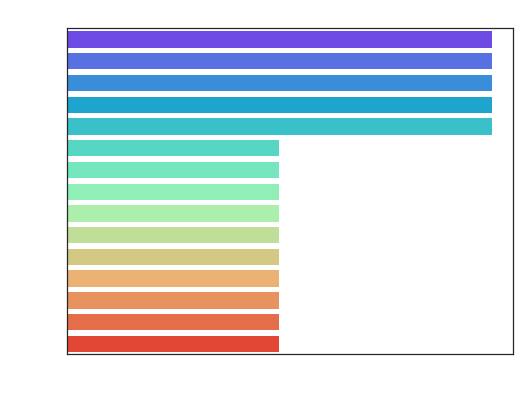

In [78]:
top = 15
plt.figure(figsize=(8,6))

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
plt.title(f"상위 %d 빈도 분석 히스토그램" % (top) , fontsize=20)
plt.xlabel("Samples")
plt.ylabel("Counts")
sns.barplot(x="sample", y="count", data=test, palette="rainbow")
plt.show()

In [79]:
#!pip install wordcloud

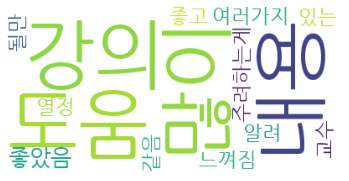

In [80]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = path,
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white'
                      ).generate_from_frequencies(wordInfo)
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()